# RBM-GG 

Gaussian - Gaussian  

1. Preprocessing data
- Normalize the data to mean = 0, sig = 1
- Use fixed sigma = 1

2. Dynamic sigma
- Normalize the data as usual
- Update sigma from the CDk algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
model = rbm.test.GGRBM
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))

number of training data 60000


## Preprocessing

In [6]:
n_data_train = 5000

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    # Normalize mean=0, sig=1
    data = np.asfarray(data[1:])/255.
    x_mean = np.mean(data)
    x_sig = np.std(data)
    x_train[i] = (data - x_mean)/x_sig

In [7]:
np.mean(x_train)

2.498681533789026e-18

In [8]:
np.std(x_train)

0.9999999999999998

In [9]:
np.min(x_train)

-0.7091296661417569

In [10]:
np.max(x_train)

6.674641888683865

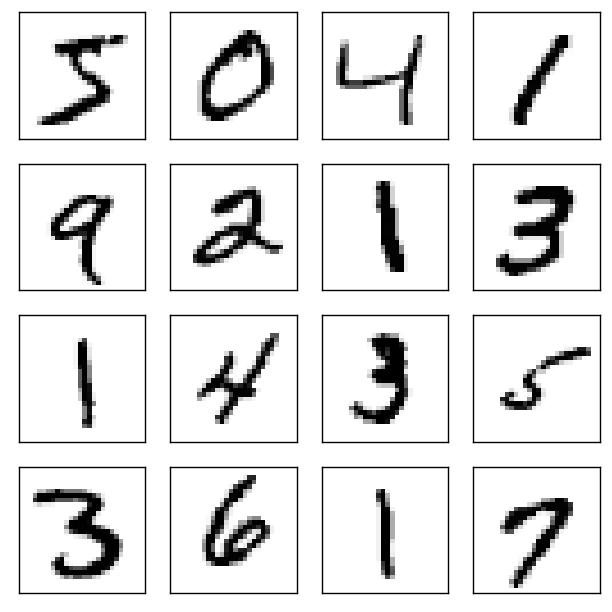

In [11]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [12]:
model = rbm.test.GGRBM(n_x, 10, 1., 1.)

In [13]:
model.fit(x_train,0.0001,3000) # fixed sig

0 loss : 2.01750 sig_v : 1.00000 sig_h : 1.00000
1 loss : 1.95749 sig_v : 1.00000 sig_h : 1.00000
2 loss : 1.94531 sig_v : 1.00000 sig_h : 1.00000
3 loss : 1.93242 sig_v : 1.00000 sig_h : 1.00000
4 loss : 1.92108 sig_v : 1.00000 sig_h : 1.00000
5 loss : 1.90757 sig_v : 1.00000 sig_h : 1.00000
6 loss : 1.89934 sig_v : 1.00000 sig_h : 1.00000
7 loss : 1.88685 sig_v : 1.00000 sig_h : 1.00000
8 loss : 1.87587 sig_v : 1.00000 sig_h : 1.00000
9 loss : 1.86249 sig_v : 1.00000 sig_h : 1.00000
10 loss : 1.85414 sig_v : 1.00000 sig_h : 1.00000
11 loss : 1.84137 sig_v : 1.00000 sig_h : 1.00000
12 loss : 1.82932 sig_v : 1.00000 sig_h : 1.00000
13 loss : 1.81814 sig_v : 1.00000 sig_h : 1.00000
14 loss : 1.81168 sig_v : 1.00000 sig_h : 1.00000
15 loss : 1.80046 sig_v : 1.00000 sig_h : 1.00000
16 loss : 1.79108 sig_v : 1.00000 sig_h : 1.00000
17 loss : 1.78271 sig_v : 1.00000 sig_h : 1.00000
18 loss : 1.77461 sig_v : 1.00000 sig_h : 1.00000
19 loss : 1.76768 sig_v : 1.00000 sig_h : 1.00000
20 loss : 

163 loss : 1.69511 sig_v : 1.00000 sig_h : 1.00000
164 loss : 1.69777 sig_v : 1.00000 sig_h : 1.00000
165 loss : 1.69511 sig_v : 1.00000 sig_h : 1.00000
166 loss : 1.69656 sig_v : 1.00000 sig_h : 1.00000
167 loss : 1.69386 sig_v : 1.00000 sig_h : 1.00000
168 loss : 1.69610 sig_v : 1.00000 sig_h : 1.00000
169 loss : 1.69427 sig_v : 1.00000 sig_h : 1.00000
170 loss : 1.69600 sig_v : 1.00000 sig_h : 1.00000
171 loss : 1.69612 sig_v : 1.00000 sig_h : 1.00000
172 loss : 1.69497 sig_v : 1.00000 sig_h : 1.00000
173 loss : 1.69656 sig_v : 1.00000 sig_h : 1.00000
174 loss : 1.69410 sig_v : 1.00000 sig_h : 1.00000
175 loss : 1.69661 sig_v : 1.00000 sig_h : 1.00000
176 loss : 1.69507 sig_v : 1.00000 sig_h : 1.00000
177 loss : 1.69480 sig_v : 1.00000 sig_h : 1.00000
178 loss : 1.69616 sig_v : 1.00000 sig_h : 1.00000
179 loss : 1.69466 sig_v : 1.00000 sig_h : 1.00000
180 loss : 1.69595 sig_v : 1.00000 sig_h : 1.00000
181 loss : 1.69762 sig_v : 1.00000 sig_h : 1.00000
182 loss : 1.69756 sig_v : 1.00

324 loss : 1.69218 sig_v : 1.00000 sig_h : 1.00000
325 loss : 1.69261 sig_v : 1.00000 sig_h : 1.00000
326 loss : 1.69375 sig_v : 1.00000 sig_h : 1.00000
327 loss : 1.69085 sig_v : 1.00000 sig_h : 1.00000
328 loss : 1.69164 sig_v : 1.00000 sig_h : 1.00000
329 loss : 1.69107 sig_v : 1.00000 sig_h : 1.00000
330 loss : 1.69357 sig_v : 1.00000 sig_h : 1.00000
331 loss : 1.69223 sig_v : 1.00000 sig_h : 1.00000
332 loss : 1.69464 sig_v : 1.00000 sig_h : 1.00000
333 loss : 1.69111 sig_v : 1.00000 sig_h : 1.00000
334 loss : 1.69327 sig_v : 1.00000 sig_h : 1.00000
335 loss : 1.69066 sig_v : 1.00000 sig_h : 1.00000
336 loss : 1.69307 sig_v : 1.00000 sig_h : 1.00000
337 loss : 1.69212 sig_v : 1.00000 sig_h : 1.00000
338 loss : 1.69034 sig_v : 1.00000 sig_h : 1.00000
339 loss : 1.69333 sig_v : 1.00000 sig_h : 1.00000
340 loss : 1.69169 sig_v : 1.00000 sig_h : 1.00000
341 loss : 1.69188 sig_v : 1.00000 sig_h : 1.00000
342 loss : 1.68989 sig_v : 1.00000 sig_h : 1.00000
343 loss : 1.69264 sig_v : 1.00

485 loss : 1.67827 sig_v : 1.00000 sig_h : 1.00000
486 loss : 1.68011 sig_v : 1.00000 sig_h : 1.00000
487 loss : 1.67943 sig_v : 1.00000 sig_h : 1.00000
488 loss : 1.67947 sig_v : 1.00000 sig_h : 1.00000
489 loss : 1.67774 sig_v : 1.00000 sig_h : 1.00000
490 loss : 1.67840 sig_v : 1.00000 sig_h : 1.00000
491 loss : 1.67693 sig_v : 1.00000 sig_h : 1.00000
492 loss : 1.67861 sig_v : 1.00000 sig_h : 1.00000
493 loss : 1.67711 sig_v : 1.00000 sig_h : 1.00000
494 loss : 1.67739 sig_v : 1.00000 sig_h : 1.00000
495 loss : 1.67913 sig_v : 1.00000 sig_h : 1.00000
496 loss : 1.67658 sig_v : 1.00000 sig_h : 1.00000
497 loss : 1.67720 sig_v : 1.00000 sig_h : 1.00000
498 loss : 1.67806 sig_v : 1.00000 sig_h : 1.00000
499 loss : 1.67805 sig_v : 1.00000 sig_h : 1.00000
500 loss : 1.67469 sig_v : 1.00000 sig_h : 1.00000
501 loss : 1.67743 sig_v : 1.00000 sig_h : 1.00000
502 loss : 1.67686 sig_v : 1.00000 sig_h : 1.00000
503 loss : 1.67652 sig_v : 1.00000 sig_h : 1.00000
504 loss : 1.67565 sig_v : 1.00

646 loss : 1.63793 sig_v : 1.00000 sig_h : 1.00000
647 loss : 1.63752 sig_v : 1.00000 sig_h : 1.00000
648 loss : 1.63631 sig_v : 1.00000 sig_h : 1.00000
649 loss : 1.63848 sig_v : 1.00000 sig_h : 1.00000
650 loss : 1.63541 sig_v : 1.00000 sig_h : 1.00000
651 loss : 1.63626 sig_v : 1.00000 sig_h : 1.00000
652 loss : 1.63662 sig_v : 1.00000 sig_h : 1.00000
653 loss : 1.63685 sig_v : 1.00000 sig_h : 1.00000
654 loss : 1.63467 sig_v : 1.00000 sig_h : 1.00000
655 loss : 1.63576 sig_v : 1.00000 sig_h : 1.00000
656 loss : 1.63457 sig_v : 1.00000 sig_h : 1.00000
657 loss : 1.63283 sig_v : 1.00000 sig_h : 1.00000
658 loss : 1.63515 sig_v : 1.00000 sig_h : 1.00000
659 loss : 1.63369 sig_v : 1.00000 sig_h : 1.00000
660 loss : 1.63101 sig_v : 1.00000 sig_h : 1.00000
661 loss : 1.63453 sig_v : 1.00000 sig_h : 1.00000
662 loss : 1.63294 sig_v : 1.00000 sig_h : 1.00000
663 loss : 1.63207 sig_v : 1.00000 sig_h : 1.00000
664 loss : 1.63196 sig_v : 1.00000 sig_h : 1.00000
665 loss : 1.63043 sig_v : 1.00

807 loss : 1.58802 sig_v : 1.00000 sig_h : 1.00000
808 loss : 1.58925 sig_v : 1.00000 sig_h : 1.00000
809 loss : 1.58929 sig_v : 1.00000 sig_h : 1.00000
810 loss : 1.58802 sig_v : 1.00000 sig_h : 1.00000
811 loss : 1.58805 sig_v : 1.00000 sig_h : 1.00000
812 loss : 1.58739 sig_v : 1.00000 sig_h : 1.00000
813 loss : 1.58860 sig_v : 1.00000 sig_h : 1.00000
814 loss : 1.58666 sig_v : 1.00000 sig_h : 1.00000
815 loss : 1.58794 sig_v : 1.00000 sig_h : 1.00000
816 loss : 1.58352 sig_v : 1.00000 sig_h : 1.00000
817 loss : 1.58797 sig_v : 1.00000 sig_h : 1.00000
818 loss : 1.58559 sig_v : 1.00000 sig_h : 1.00000
819 loss : 1.58600 sig_v : 1.00000 sig_h : 1.00000
820 loss : 1.58749 sig_v : 1.00000 sig_h : 1.00000
821 loss : 1.58515 sig_v : 1.00000 sig_h : 1.00000
822 loss : 1.58502 sig_v : 1.00000 sig_h : 1.00000
823 loss : 1.58554 sig_v : 1.00000 sig_h : 1.00000
824 loss : 1.58434 sig_v : 1.00000 sig_h : 1.00000
825 loss : 1.58450 sig_v : 1.00000 sig_h : 1.00000
826 loss : 1.58450 sig_v : 1.00

968 loss : 1.54852 sig_v : 1.00000 sig_h : 1.00000
969 loss : 1.54661 sig_v : 1.00000 sig_h : 1.00000
970 loss : 1.54825 sig_v : 1.00000 sig_h : 1.00000
971 loss : 1.54648 sig_v : 1.00000 sig_h : 1.00000
972 loss : 1.54690 sig_v : 1.00000 sig_h : 1.00000
973 loss : 1.54556 sig_v : 1.00000 sig_h : 1.00000
974 loss : 1.54566 sig_v : 1.00000 sig_h : 1.00000
975 loss : 1.54537 sig_v : 1.00000 sig_h : 1.00000
976 loss : 1.54567 sig_v : 1.00000 sig_h : 1.00000
977 loss : 1.54537 sig_v : 1.00000 sig_h : 1.00000
978 loss : 1.54519 sig_v : 1.00000 sig_h : 1.00000
979 loss : 1.54333 sig_v : 1.00000 sig_h : 1.00000
980 loss : 1.54503 sig_v : 1.00000 sig_h : 1.00000
981 loss : 1.54368 sig_v : 1.00000 sig_h : 1.00000
982 loss : 1.54481 sig_v : 1.00000 sig_h : 1.00000
983 loss : 1.54253 sig_v : 1.00000 sig_h : 1.00000
984 loss : 1.54322 sig_v : 1.00000 sig_h : 1.00000
985 loss : 1.54385 sig_v : 1.00000 sig_h : 1.00000
986 loss : 1.54210 sig_v : 1.00000 sig_h : 1.00000
987 loss : 1.54336 sig_v : 1.00

1127 loss : 1.51295 sig_v : 1.00000 sig_h : 1.00000
1128 loss : 1.51161 sig_v : 1.00000 sig_h : 1.00000
1129 loss : 1.51077 sig_v : 1.00000 sig_h : 1.00000
1130 loss : 1.51268 sig_v : 1.00000 sig_h : 1.00000
1131 loss : 1.51010 sig_v : 1.00000 sig_h : 1.00000
1132 loss : 1.51056 sig_v : 1.00000 sig_h : 1.00000
1133 loss : 1.51116 sig_v : 1.00000 sig_h : 1.00000
1134 loss : 1.51140 sig_v : 1.00000 sig_h : 1.00000
1135 loss : 1.51229 sig_v : 1.00000 sig_h : 1.00000
1136 loss : 1.50864 sig_v : 1.00000 sig_h : 1.00000
1137 loss : 1.51120 sig_v : 1.00000 sig_h : 1.00000
1138 loss : 1.50976 sig_v : 1.00000 sig_h : 1.00000
1139 loss : 1.51034 sig_v : 1.00000 sig_h : 1.00000
1140 loss : 1.50954 sig_v : 1.00000 sig_h : 1.00000
1141 loss : 1.50975 sig_v : 1.00000 sig_h : 1.00000
1142 loss : 1.50913 sig_v : 1.00000 sig_h : 1.00000
1143 loss : 1.50823 sig_v : 1.00000 sig_h : 1.00000
1144 loss : 1.50751 sig_v : 1.00000 sig_h : 1.00000
1145 loss : 1.50846 sig_v : 1.00000 sig_h : 1.00000
1146 loss : 

1285 loss : 1.48821 sig_v : 1.00000 sig_h : 1.00000
1286 loss : 1.48603 sig_v : 1.00000 sig_h : 1.00000
1287 loss : 1.48604 sig_v : 1.00000 sig_h : 1.00000
1288 loss : 1.48730 sig_v : 1.00000 sig_h : 1.00000
1289 loss : 1.48662 sig_v : 1.00000 sig_h : 1.00000
1290 loss : 1.48661 sig_v : 1.00000 sig_h : 1.00000
1291 loss : 1.48715 sig_v : 1.00000 sig_h : 1.00000
1292 loss : 1.48702 sig_v : 1.00000 sig_h : 1.00000
1293 loss : 1.48782 sig_v : 1.00000 sig_h : 1.00000
1294 loss : 1.48609 sig_v : 1.00000 sig_h : 1.00000
1295 loss : 1.48606 sig_v : 1.00000 sig_h : 1.00000
1296 loss : 1.48656 sig_v : 1.00000 sig_h : 1.00000
1297 loss : 1.48567 sig_v : 1.00000 sig_h : 1.00000
1298 loss : 1.48714 sig_v : 1.00000 sig_h : 1.00000
1299 loss : 1.48669 sig_v : 1.00000 sig_h : 1.00000
1300 loss : 1.48568 sig_v : 1.00000 sig_h : 1.00000
1301 loss : 1.48433 sig_v : 1.00000 sig_h : 1.00000
1302 loss : 1.48559 sig_v : 1.00000 sig_h : 1.00000
1303 loss : 1.48593 sig_v : 1.00000 sig_h : 1.00000
1304 loss : 

1443 loss : 1.47038 sig_v : 1.00000 sig_h : 1.00000
1444 loss : 1.47178 sig_v : 1.00000 sig_h : 1.00000
1445 loss : 1.46895 sig_v : 1.00000 sig_h : 1.00000
1446 loss : 1.47060 sig_v : 1.00000 sig_h : 1.00000
1447 loss : 1.47039 sig_v : 1.00000 sig_h : 1.00000
1448 loss : 1.46948 sig_v : 1.00000 sig_h : 1.00000
1449 loss : 1.46751 sig_v : 1.00000 sig_h : 1.00000
1450 loss : 1.46894 sig_v : 1.00000 sig_h : 1.00000
1451 loss : 1.46985 sig_v : 1.00000 sig_h : 1.00000
1452 loss : 1.46883 sig_v : 1.00000 sig_h : 1.00000
1453 loss : 1.46981 sig_v : 1.00000 sig_h : 1.00000
1454 loss : 1.47119 sig_v : 1.00000 sig_h : 1.00000
1455 loss : 1.47037 sig_v : 1.00000 sig_h : 1.00000
1456 loss : 1.47015 sig_v : 1.00000 sig_h : 1.00000
1457 loss : 1.46995 sig_v : 1.00000 sig_h : 1.00000
1458 loss : 1.46771 sig_v : 1.00000 sig_h : 1.00000
1459 loss : 1.46832 sig_v : 1.00000 sig_h : 1.00000
1460 loss : 1.46886 sig_v : 1.00000 sig_h : 1.00000
1461 loss : 1.46957 sig_v : 1.00000 sig_h : 1.00000
1462 loss : 

1601 loss : 1.45534 sig_v : 1.00000 sig_h : 1.00000
1602 loss : 1.45552 sig_v : 1.00000 sig_h : 1.00000
1603 loss : 1.45516 sig_v : 1.00000 sig_h : 1.00000
1604 loss : 1.45633 sig_v : 1.00000 sig_h : 1.00000
1605 loss : 1.45712 sig_v : 1.00000 sig_h : 1.00000
1606 loss : 1.45571 sig_v : 1.00000 sig_h : 1.00000
1607 loss : 1.45621 sig_v : 1.00000 sig_h : 1.00000
1608 loss : 1.45558 sig_v : 1.00000 sig_h : 1.00000
1609 loss : 1.45502 sig_v : 1.00000 sig_h : 1.00000
1610 loss : 1.45623 sig_v : 1.00000 sig_h : 1.00000
1611 loss : 1.45661 sig_v : 1.00000 sig_h : 1.00000
1612 loss : 1.45534 sig_v : 1.00000 sig_h : 1.00000
1613 loss : 1.45373 sig_v : 1.00000 sig_h : 1.00000
1614 loss : 1.45694 sig_v : 1.00000 sig_h : 1.00000
1615 loss : 1.45324 sig_v : 1.00000 sig_h : 1.00000
1616 loss : 1.45563 sig_v : 1.00000 sig_h : 1.00000
1617 loss : 1.45597 sig_v : 1.00000 sig_h : 1.00000
1618 loss : 1.45418 sig_v : 1.00000 sig_h : 1.00000
1619 loss : 1.45442 sig_v : 1.00000 sig_h : 1.00000
1620 loss : 

1759 loss : 1.44828 sig_v : 1.00000 sig_h : 1.00000
1760 loss : 1.44857 sig_v : 1.00000 sig_h : 1.00000
1761 loss : 1.44768 sig_v : 1.00000 sig_h : 1.00000
1762 loss : 1.44691 sig_v : 1.00000 sig_h : 1.00000
1763 loss : 1.44807 sig_v : 1.00000 sig_h : 1.00000
1764 loss : 1.44870 sig_v : 1.00000 sig_h : 1.00000
1765 loss : 1.44620 sig_v : 1.00000 sig_h : 1.00000
1766 loss : 1.44823 sig_v : 1.00000 sig_h : 1.00000
1767 loss : 1.44719 sig_v : 1.00000 sig_h : 1.00000
1768 loss : 1.44669 sig_v : 1.00000 sig_h : 1.00000
1769 loss : 1.44856 sig_v : 1.00000 sig_h : 1.00000
1770 loss : 1.44658 sig_v : 1.00000 sig_h : 1.00000
1771 loss : 1.44638 sig_v : 1.00000 sig_h : 1.00000
1772 loss : 1.44582 sig_v : 1.00000 sig_h : 1.00000
1773 loss : 1.44594 sig_v : 1.00000 sig_h : 1.00000
1774 loss : 1.44584 sig_v : 1.00000 sig_h : 1.00000
1775 loss : 1.44787 sig_v : 1.00000 sig_h : 1.00000
1776 loss : 1.44665 sig_v : 1.00000 sig_h : 1.00000
1777 loss : 1.44629 sig_v : 1.00000 sig_h : 1.00000
1778 loss : 

1917 loss : 1.44273 sig_v : 1.00000 sig_h : 1.00000
1918 loss : 1.44112 sig_v : 1.00000 sig_h : 1.00000
1919 loss : 1.44107 sig_v : 1.00000 sig_h : 1.00000
1920 loss : 1.44216 sig_v : 1.00000 sig_h : 1.00000
1921 loss : 1.44210 sig_v : 1.00000 sig_h : 1.00000
1922 loss : 1.44074 sig_v : 1.00000 sig_h : 1.00000
1923 loss : 1.44090 sig_v : 1.00000 sig_h : 1.00000
1924 loss : 1.44085 sig_v : 1.00000 sig_h : 1.00000
1925 loss : 1.43964 sig_v : 1.00000 sig_h : 1.00000
1926 loss : 1.44001 sig_v : 1.00000 sig_h : 1.00000
1927 loss : 1.44102 sig_v : 1.00000 sig_h : 1.00000
1928 loss : 1.44478 sig_v : 1.00000 sig_h : 1.00000
1929 loss : 1.44045 sig_v : 1.00000 sig_h : 1.00000
1930 loss : 1.43880 sig_v : 1.00000 sig_h : 1.00000
1931 loss : 1.43990 sig_v : 1.00000 sig_h : 1.00000
1932 loss : 1.44165 sig_v : 1.00000 sig_h : 1.00000
1933 loss : 1.44105 sig_v : 1.00000 sig_h : 1.00000
1934 loss : 1.43998 sig_v : 1.00000 sig_h : 1.00000
1935 loss : 1.44221 sig_v : 1.00000 sig_h : 1.00000
1936 loss : 

2075 loss : 1.43509 sig_v : 1.00000 sig_h : 1.00000
2076 loss : 1.43513 sig_v : 1.00000 sig_h : 1.00000
2077 loss : 1.43531 sig_v : 1.00000 sig_h : 1.00000
2078 loss : 1.43625 sig_v : 1.00000 sig_h : 1.00000
2079 loss : 1.43539 sig_v : 1.00000 sig_h : 1.00000
2080 loss : 1.43550 sig_v : 1.00000 sig_h : 1.00000
2081 loss : 1.43464 sig_v : 1.00000 sig_h : 1.00000
2082 loss : 1.43464 sig_v : 1.00000 sig_h : 1.00000
2083 loss : 1.43328 sig_v : 1.00000 sig_h : 1.00000
2084 loss : 1.43379 sig_v : 1.00000 sig_h : 1.00000
2085 loss : 1.43578 sig_v : 1.00000 sig_h : 1.00000
2086 loss : 1.43545 sig_v : 1.00000 sig_h : 1.00000
2087 loss : 1.43498 sig_v : 1.00000 sig_h : 1.00000
2088 loss : 1.43574 sig_v : 1.00000 sig_h : 1.00000
2089 loss : 1.43490 sig_v : 1.00000 sig_h : 1.00000
2090 loss : 1.43492 sig_v : 1.00000 sig_h : 1.00000
2091 loss : 1.43519 sig_v : 1.00000 sig_h : 1.00000
2092 loss : 1.43435 sig_v : 1.00000 sig_h : 1.00000
2093 loss : 1.43367 sig_v : 1.00000 sig_h : 1.00000
2094 loss : 

2233 loss : 1.42838 sig_v : 1.00000 sig_h : 1.00000
2234 loss : 1.42798 sig_v : 1.00000 sig_h : 1.00000
2235 loss : 1.42716 sig_v : 1.00000 sig_h : 1.00000
2236 loss : 1.42840 sig_v : 1.00000 sig_h : 1.00000
2237 loss : 1.42860 sig_v : 1.00000 sig_h : 1.00000
2238 loss : 1.42924 sig_v : 1.00000 sig_h : 1.00000
2239 loss : 1.42933 sig_v : 1.00000 sig_h : 1.00000
2240 loss : 1.42935 sig_v : 1.00000 sig_h : 1.00000
2241 loss : 1.42660 sig_v : 1.00000 sig_h : 1.00000
2242 loss : 1.42667 sig_v : 1.00000 sig_h : 1.00000
2243 loss : 1.42747 sig_v : 1.00000 sig_h : 1.00000
2244 loss : 1.42857 sig_v : 1.00000 sig_h : 1.00000
2245 loss : 1.42716 sig_v : 1.00000 sig_h : 1.00000
2246 loss : 1.42759 sig_v : 1.00000 sig_h : 1.00000
2247 loss : 1.42621 sig_v : 1.00000 sig_h : 1.00000
2248 loss : 1.42700 sig_v : 1.00000 sig_h : 1.00000
2249 loss : 1.42771 sig_v : 1.00000 sig_h : 1.00000
2250 loss : 1.42945 sig_v : 1.00000 sig_h : 1.00000
2251 loss : 1.42899 sig_v : 1.00000 sig_h : 1.00000
2252 loss : 

2391 loss : 1.42137 sig_v : 1.00000 sig_h : 1.00000
2392 loss : 1.42098 sig_v : 1.00000 sig_h : 1.00000
2393 loss : 1.42047 sig_v : 1.00000 sig_h : 1.00000
2394 loss : 1.41997 sig_v : 1.00000 sig_h : 1.00000
2395 loss : 1.42297 sig_v : 1.00000 sig_h : 1.00000
2396 loss : 1.42116 sig_v : 1.00000 sig_h : 1.00000
2397 loss : 1.41961 sig_v : 1.00000 sig_h : 1.00000
2398 loss : 1.42064 sig_v : 1.00000 sig_h : 1.00000
2399 loss : 1.41877 sig_v : 1.00000 sig_h : 1.00000
2400 loss : 1.42077 sig_v : 1.00000 sig_h : 1.00000
2401 loss : 1.42142 sig_v : 1.00000 sig_h : 1.00000
2402 loss : 1.42096 sig_v : 1.00000 sig_h : 1.00000
2403 loss : 1.42130 sig_v : 1.00000 sig_h : 1.00000
2404 loss : 1.42085 sig_v : 1.00000 sig_h : 1.00000
2405 loss : 1.41824 sig_v : 1.00000 sig_h : 1.00000
2406 loss : 1.42138 sig_v : 1.00000 sig_h : 1.00000
2407 loss : 1.41886 sig_v : 1.00000 sig_h : 1.00000
2408 loss : 1.42167 sig_v : 1.00000 sig_h : 1.00000
2409 loss : 1.42233 sig_v : 1.00000 sig_h : 1.00000
2410 loss : 

2549 loss : 1.41672 sig_v : 1.00000 sig_h : 1.00000
2550 loss : 1.41517 sig_v : 1.00000 sig_h : 1.00000
2551 loss : 1.41496 sig_v : 1.00000 sig_h : 1.00000
2552 loss : 1.41414 sig_v : 1.00000 sig_h : 1.00000
2553 loss : 1.41343 sig_v : 1.00000 sig_h : 1.00000
2554 loss : 1.41467 sig_v : 1.00000 sig_h : 1.00000
2555 loss : 1.41631 sig_v : 1.00000 sig_h : 1.00000
2556 loss : 1.41548 sig_v : 1.00000 sig_h : 1.00000
2557 loss : 1.41314 sig_v : 1.00000 sig_h : 1.00000
2558 loss : 1.41572 sig_v : 1.00000 sig_h : 1.00000
2559 loss : 1.41506 sig_v : 1.00000 sig_h : 1.00000
2560 loss : 1.41429 sig_v : 1.00000 sig_h : 1.00000
2561 loss : 1.41412 sig_v : 1.00000 sig_h : 1.00000
2562 loss : 1.41391 sig_v : 1.00000 sig_h : 1.00000
2563 loss : 1.41318 sig_v : 1.00000 sig_h : 1.00000
2564 loss : 1.41460 sig_v : 1.00000 sig_h : 1.00000
2565 loss : 1.41506 sig_v : 1.00000 sig_h : 1.00000
2566 loss : 1.41570 sig_v : 1.00000 sig_h : 1.00000
2567 loss : 1.41400 sig_v : 1.00000 sig_h : 1.00000
2568 loss : 

2707 loss : 1.41176 sig_v : 1.00000 sig_h : 1.00000
2708 loss : 1.41159 sig_v : 1.00000 sig_h : 1.00000
2709 loss : 1.41272 sig_v : 1.00000 sig_h : 1.00000
2710 loss : 1.41105 sig_v : 1.00000 sig_h : 1.00000
2711 loss : 1.41109 sig_v : 1.00000 sig_h : 1.00000
2712 loss : 1.41060 sig_v : 1.00000 sig_h : 1.00000
2713 loss : 1.41176 sig_v : 1.00000 sig_h : 1.00000
2714 loss : 1.41050 sig_v : 1.00000 sig_h : 1.00000
2715 loss : 1.41176 sig_v : 1.00000 sig_h : 1.00000
2716 loss : 1.41166 sig_v : 1.00000 sig_h : 1.00000
2717 loss : 1.41121 sig_v : 1.00000 sig_h : 1.00000
2718 loss : 1.41225 sig_v : 1.00000 sig_h : 1.00000
2719 loss : 1.41161 sig_v : 1.00000 sig_h : 1.00000
2720 loss : 1.41233 sig_v : 1.00000 sig_h : 1.00000
2721 loss : 1.41095 sig_v : 1.00000 sig_h : 1.00000
2722 loss : 1.41132 sig_v : 1.00000 sig_h : 1.00000
2723 loss : 1.41098 sig_v : 1.00000 sig_h : 1.00000
2724 loss : 1.41190 sig_v : 1.00000 sig_h : 1.00000
2725 loss : 1.40948 sig_v : 1.00000 sig_h : 1.00000
2726 loss : 

2865 loss : 1.40835 sig_v : 1.00000 sig_h : 1.00000
2866 loss : 1.40979 sig_v : 1.00000 sig_h : 1.00000
2867 loss : 1.40966 sig_v : 1.00000 sig_h : 1.00000
2868 loss : 1.40797 sig_v : 1.00000 sig_h : 1.00000
2869 loss : 1.40826 sig_v : 1.00000 sig_h : 1.00000
2870 loss : 1.40869 sig_v : 1.00000 sig_h : 1.00000
2871 loss : 1.40854 sig_v : 1.00000 sig_h : 1.00000
2872 loss : 1.40940 sig_v : 1.00000 sig_h : 1.00000
2873 loss : 1.40872 sig_v : 1.00000 sig_h : 1.00000
2874 loss : 1.40935 sig_v : 1.00000 sig_h : 1.00000
2875 loss : 1.40817 sig_v : 1.00000 sig_h : 1.00000
2876 loss : 1.40783 sig_v : 1.00000 sig_h : 1.00000
2877 loss : 1.40819 sig_v : 1.00000 sig_h : 1.00000
2878 loss : 1.40901 sig_v : 1.00000 sig_h : 1.00000
2879 loss : 1.40938 sig_v : 1.00000 sig_h : 1.00000
2880 loss : 1.40759 sig_v : 1.00000 sig_h : 1.00000
2881 loss : 1.40685 sig_v : 1.00000 sig_h : 1.00000
2882 loss : 1.40945 sig_v : 1.00000 sig_h : 1.00000
2883 loss : 1.40878 sig_v : 1.00000 sig_h : 1.00000
2884 loss : 

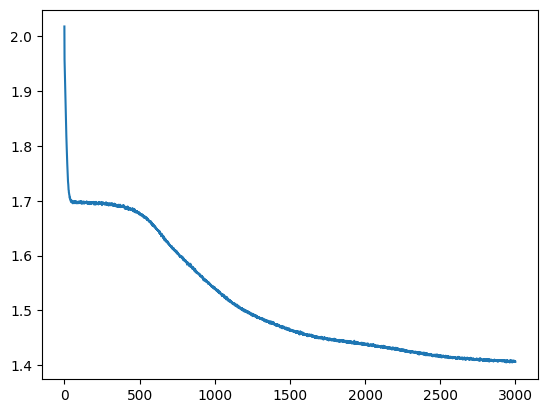

In [14]:
plt.plot(np.arange(len(model.history['loss'])),model.history['loss'])

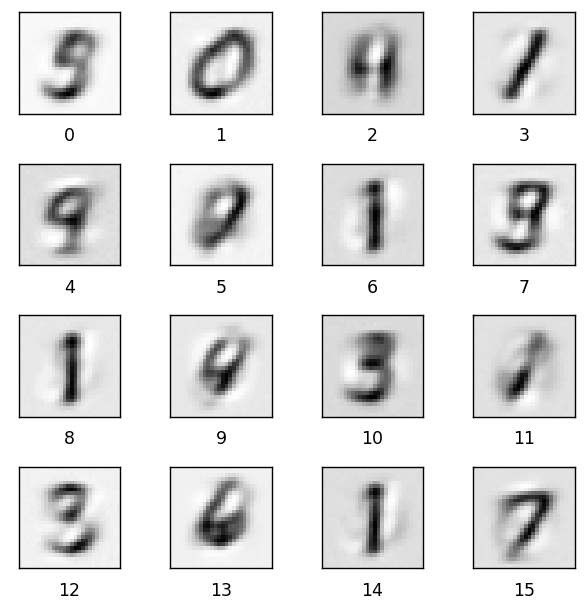

In [15]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

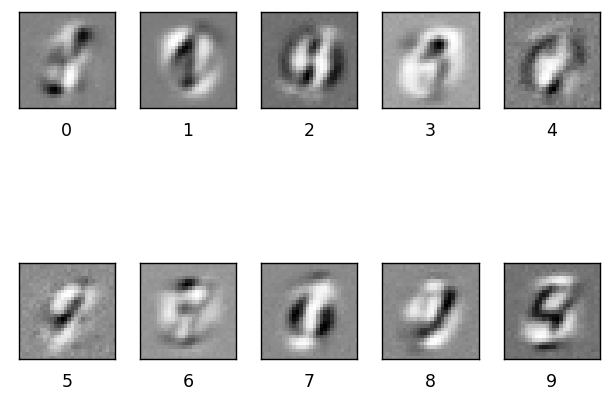

In [16]:
hid[0]# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

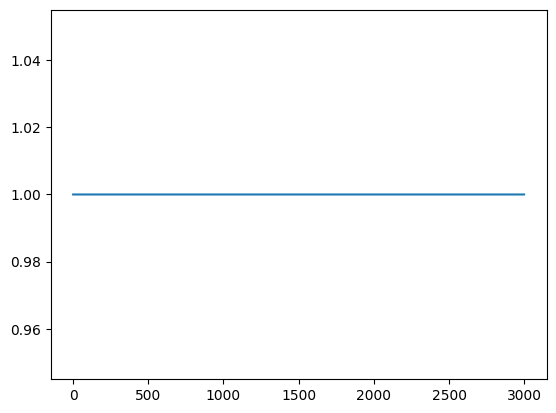

In [17]:
plt.plot(np.arange(len(model.history['sig_v'])),model.history['sig_v'])

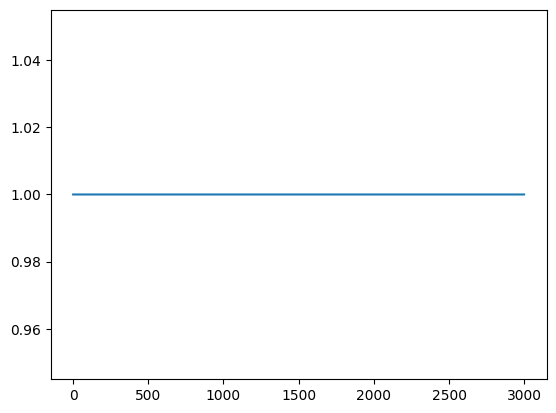

In [18]:
plt.plot(np.arange(len(model.history['sig_h'])),model.history['sig_h'])

## Define RBM dynamic sigma

In [19]:
model = rbm.test.GGRBM(n_x, 10, 1., 1.)

In [ ]:
model.fit(x_train,0.0001,3000, 10) # fixed sig

0 loss : 1.11931 sig_v : 0.31655 sig_h : 0.35334
1 loss : 1.00938 sig_v : 0.10006 sig_h : 0.11231
2 loss : 1.00099 sig_v : 0.03165 sig_h : 0.03562
3 loss : 1.00010 sig_v : 0.01000 sig_h : 0.01122
4 loss : 1.00001 sig_v : 0.00316 sig_h : 0.00355
5 loss : 1.00000 sig_v : 0.00100 sig_h : 0.00112
6 loss : 1.00000 sig_v : 0.00032 sig_h : 0.00035
7 loss : 1.00000 sig_v : 0.00010 sig_h : 0.00011
8 loss : 1.00000 sig_v : 0.00003 sig_h : 0.00004
9 loss : 1.00000 sig_v : 0.00001 sig_h : 0.00001
10 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
11 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
12 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
13 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
14 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
15 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
16 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
17 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
18 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
19 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
20 loss : 

163 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
164 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
165 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
166 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
167 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
168 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
169 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
170 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
171 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
172 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
173 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
174 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
175 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
176 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
177 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
178 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
179 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
180 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
181 loss : 1.00000 sig_v : 0.00000 sig_h : 0.00000
182 loss : 1.00000 sig_v : 0.00

In [ ]:
plt.plot(np.arange(len(model.history['loss'])),model.history['loss'])

In [ ]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
hid[0]# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
plt.plot(np.arange(len(model.history['sig_v'])),model.history['sig_v'])

In [ ]:
plt.plot(np.arange(len(model.history['sig_h'])),model.history['sig_h'])